In [1]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.actor_critic_agent import ActorCriticAgent
from source.utils import utils
from tqdm import tqdm
import torch
import random

/Users/tonywy/micromamba/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using device: cpu
policy_gradient_agent_test passed!


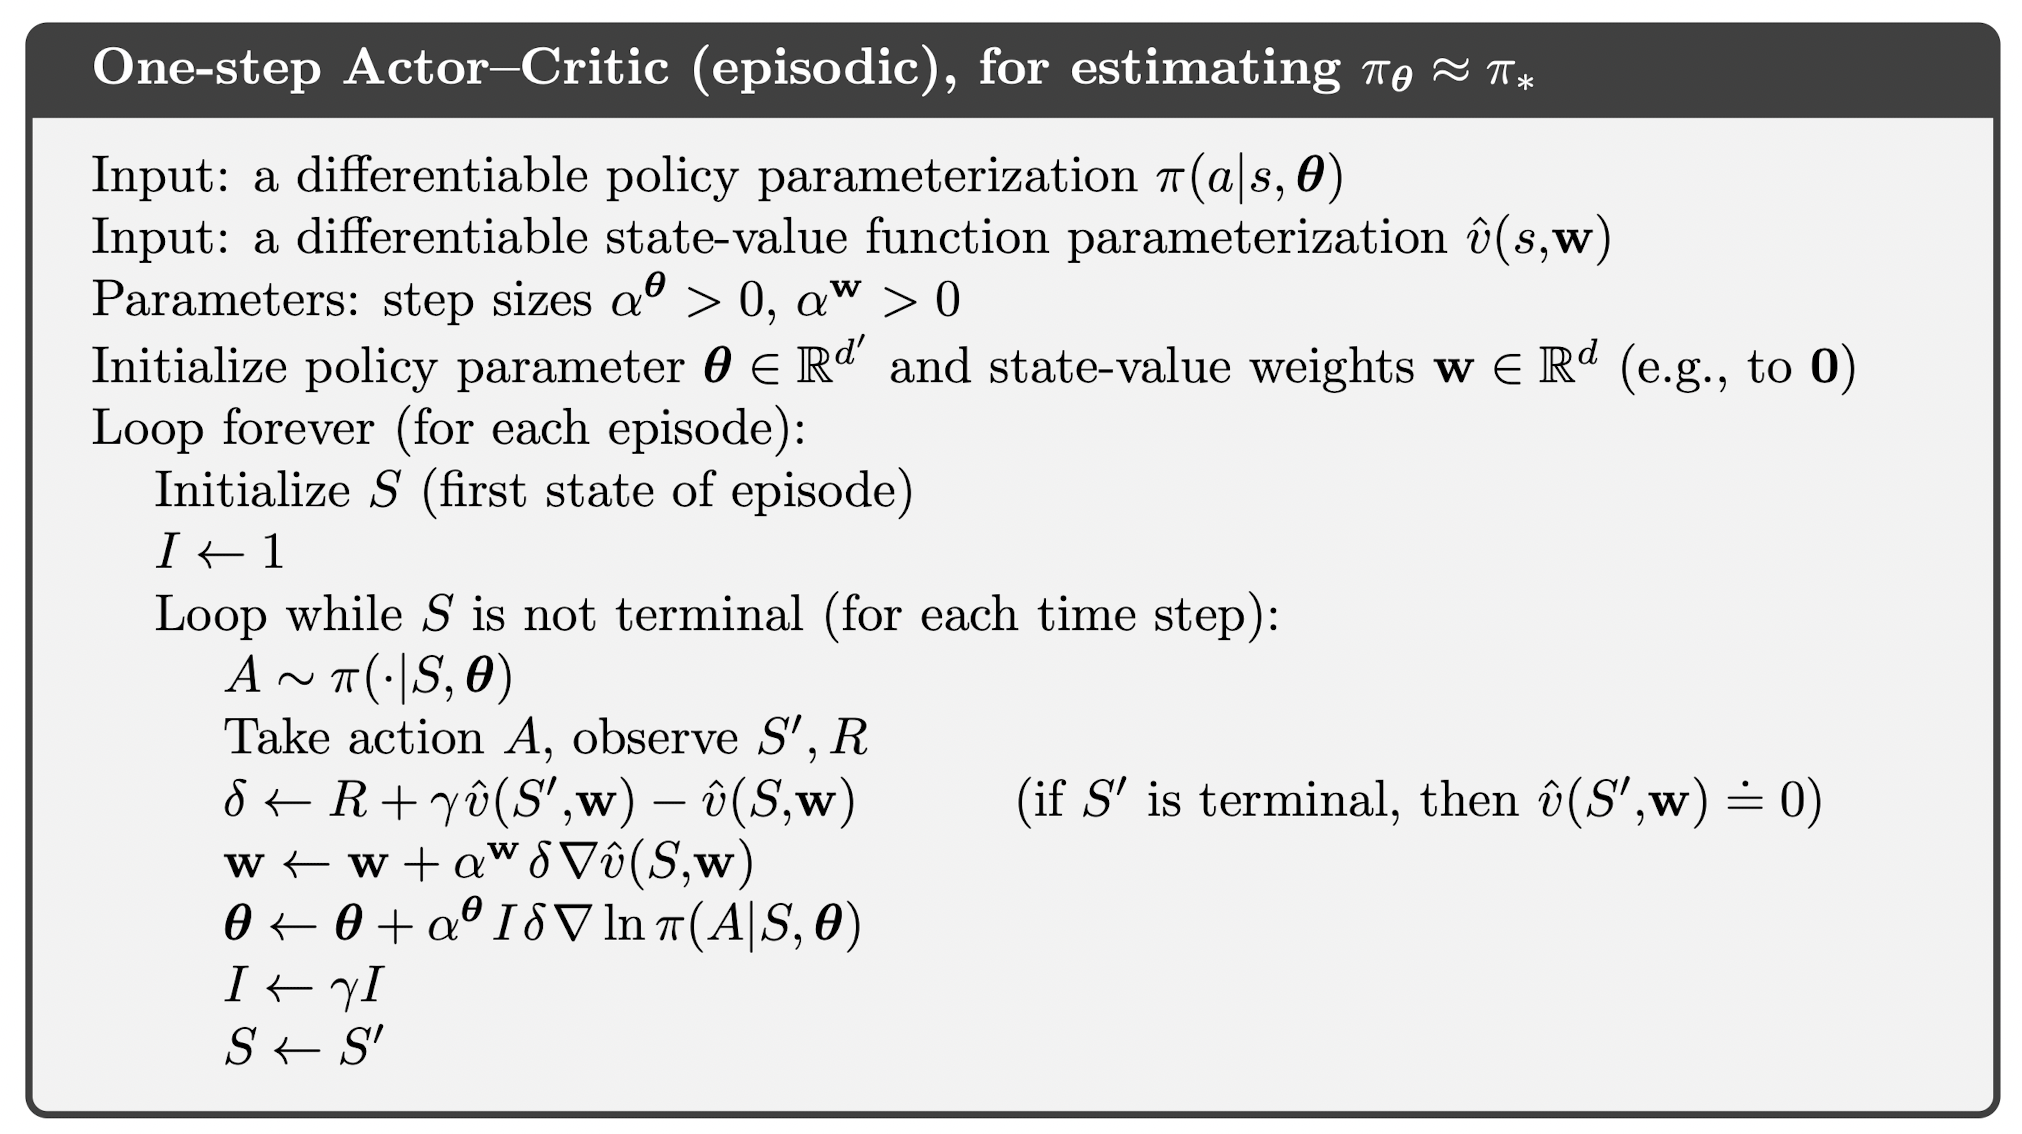

using device: cpu


100%|██████████| 100/100 [00:01<00:00, 84.57it/s]


step: 0, average_return: 15.64, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 136.34it/s]


step: 1, average_return: 12.675, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 133.69it/s]


step: 2, average_return: 11.64, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 143.58it/s]


step: 3, average_return: 11.06, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 132.91it/s]


step: 4, average_return: 10.728, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 139.16it/s]


step: 5, average_return: 10.5, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 134.48it/s]


step: 6, average_return: 10.337142857142856, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 129.20it/s]


step: 7, average_return: 10.21125, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 130.30it/s]


step: 8, average_return: 10.122222222222222, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 135.62it/s]


step: 9, average_return: 10.037, success rate: 1.0

rewarding episodes: 10037.0


100%|██████████| 100/100 [00:00<00:00, 142.27it/s]


Average return = 9.23, Success rate = 0.0


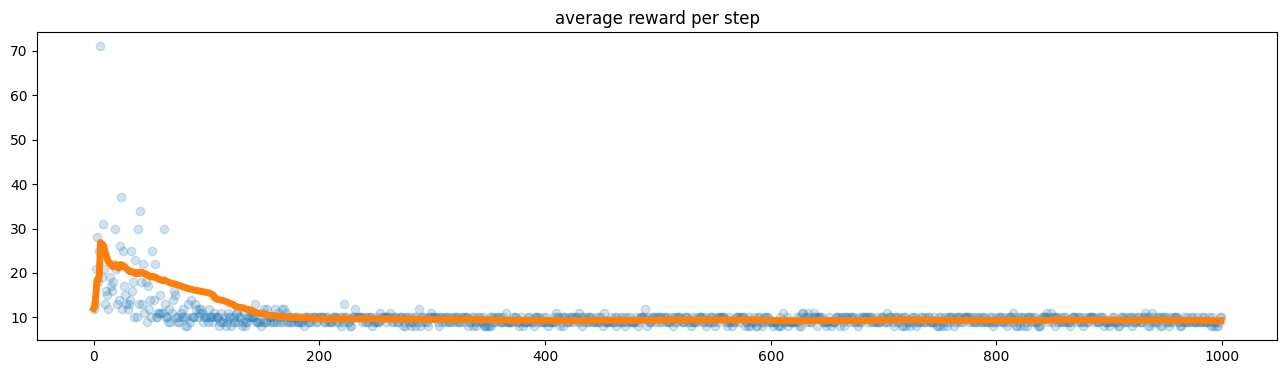

In [2]:
# Policy Eval
# Params
num_epoch = 10
num_episode = 100
video_path = os.path.join(ROOT, "video/ac.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
#env = gym.make(
#    "LunarLander-v2",
#    render_mode='rgb_array'
#)
env = gym.make("CartPole-v1", render_mode='rgb_array')
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)
env.np_random = rng

# Create Agent
agent = ActorCriticAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=None,
    policy_lr=1e-3,
    value_lr=1e-3,
)
# Start Learning
for i in range(num_epoch):
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env)
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    print(
        f"step: {i}, average_return: {np.mean(history)}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, num_episode=100, threshold=500)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


In [3]:

reward, _ = agent.play_episode(env, video_path=video_path, epsilon=0)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


Moviepy - Building video ../../video/ac.mp4.
Moviepy - Writing video ../../video/ac.mp4



Moviepy - Done !
Moviepy - video ready ../../video/ac.mp4
8.0
